In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import plotly.offline as offline
import plotly.graph_objs as go


In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
oil = pd.read_csv("oil.csv")
holidays_events = pd.read_csv("holidays_events.csv")
stores = pd.read_csv("stores.csv")
transactions = pd.read_csv("transactions.csv")


In [3]:
oil['date'] = pd.to_datetime(oil['date'])
train['date'] = pd.to_datetime(train['date'])
test['date'] = pd.to_datetime(test['date'])
holidays_events['date'] = pd.to_datetime(holidays_events['date'])
transactions['date'] = pd.to_datetime(transactions['date'])


In [4]:
df_train = train.copy()
# df_train = pd.merge(train, stores, how='inner', on='store_nbr')
# df_train = pd.merge(df_train, oil, how='left', on='date')
# df_train = pd.merge(df_train, holidays_events, how='left', on='date')
# df_train = pd.merge(df_train, transactions, how='left', on=['date', 'store_nbr'])
# df_train = df_train.rename(columns={'type_x' : 'store_type','type_y':'holiday_type'})


df_train.date = pd.to_datetime(df_train.date)
# df_train['day'] = df_train.date.dt.day
# df_train['month'] = df_train.date.dt.month
# df_train['year'] = df_train.date.dt.year
# df_train['quarter'] = df_train.date.dt.quarter
# df_train['dcoilwtico'] = df_train['dcoilwtico'].fillna(method='bfill')
# df_train['transactions'] = df_train['transactions'].replace(np.nan,0)

# df_train[['locale','locale_name', 'description']] = df_train[['locale','locale_name', 'description']].replace(np.nan,'')
# df_train['transferred'] = df_train['transferred'].replace(np.nan,False)
# df_train[['locale','locale_name', 'description']] = df_train[['locale','locale_name', 'description']].replace(np.nan,'')
# df_train['holiday_type'] = df_train['holiday_type'].replace(np.nan,'WorkDay')
# df_train['transferred'] = df_train['transferred'].replace(np.nan,False)

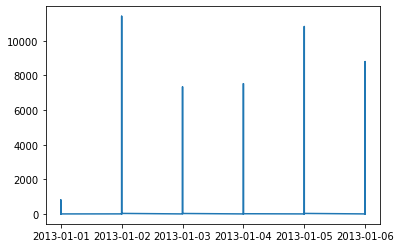

In [26]:
plt.plot(df_train[:10000]['date'], df_train[:10000]['sales'])

In [20]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def ADF_test(df):
    result = adfuller(df['sales'].dropna(), autolag='AIC')
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print(result)

In [22]:
ADF_test(df_train[:10000])


ADF Statistic: -8.441406
p-value: 0.000000
(-8.441406011604053, 1.7591579134191443e-13, 38, 9961, {'1%': -3.4310066595695945, '5%': -2.861830204343065, '10%': -2.5669244706354584}, 148692.21573913711)


Seasonality

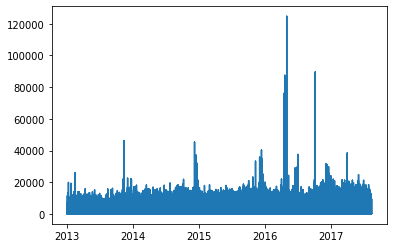

In [57]:
plt.plot(df_train['date'], df_train['sales'])

In [48]:
np.where(df_train.isna())

(array([], dtype=int64), array([], dtype=int64))

In [21]:
sales = df_data[:train.shape[0]].groupby('date').agg({"sales" : "mean"}).reset_index()
sales.set_index('date',inplace=True)
moving_average = sales.rolling(
    window=365,       # 365-day window
    center=True,      # puts the average at the center of the window
    min_periods=183,  # choose about half the window size
).mean()              # compute the mean (could also do median, std, min, max, ...)
moving_average['date'] = sales.index

fig = make_subplots(rows=1, cols=1, vertical_spacing=0.08,                    
                    subplot_titles=("Sales 365 - Day Moving Average"))
fig.add_trace(go.Scatter(x=sales.index, y=sales['sales'], mode='lines', fill='tozeroy', fillcolor='#c6ccd8',
                     marker=dict(color= '#334668'), name='365-Day Moving Average'))
fig.add_trace(go.Scatter(x=moving_average.date,y=moving_average.sales,mode='lines',name='Trend'))
fig.update_layout(height=350, bargap=0.15,
                  margin=dict(b=0,r=20,l=20), 
                  title_text="Sales trend during years",
                  template="plotly_white",
                  title_font=dict(size=25, color='#8a8d93', family="Lato, sans-serif"),
                  font=dict(color='#8a8d93'),
                  hoverlabel=dict(bgcolor="#f2f2f2", font_size=13, font_family="Lato, sans-serif"),
                  showlegend=False)
fig.show()

NameError: name 'make_subplots' is not defined